In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from statistics import mean
from sklearn.linear_model import LogisticRegression

In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Description de la dataset

Il s'agit d'un ensemble de données composé de plusieurs caractéristiques d'étoiles.
Absolute Temperature (in K)
Relative Luminosity (L/Lo)
Relative Radius (R/Ro)
Absolute Magnitude (Mv)
Star Color (white,Red,Blue,Yellow,yellow-orange etc)
Spectral Class (O,B,A,F,G,K,,M)
Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)

# Star Dataset

In [46]:
import pandas as pd
df2= pd.read_csv('C:/Users/yessm/Desktop/6 class csv.csv')
df2.head(20)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.120,0,Red,M
1,3042,0.000500,0.1542,16.600,0,Red,M
2,2600,0.000300,0.1020,18.700,0,Red,M
3,2800,0.000200,0.1600,16.650,0,Red,M
4,1939,0.000138,0.1030,20.060,0,Red,M
5,2840,0.000650,0.1100,16.980,0,Red,M
6,2637,0.000730,0.1270,17.220,0,Red,M
7,2600,0.000400,0.0960,17.400,0,Red,M
8,2650,0.000690,0.1100,17.450,0,Red,M
9,2700,0.000180,0.1300,16.050,0,Red,M


In [48]:
df2.columns=['Temperature','Luminosity','Radius','Abs_mag','Star type','Star color','Spectral Class']

nRow, nCol = df2.shape
print(f'Il ya  {nRow} lignes et {nCol} colonnes')

Il ya  240 lignes et 7 colonnes


In [43]:
df2.describe()

,Temperature,Luminosity,Radius,Abs_mag,Star type,Blue,Red,White,Yellow
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.0000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000,0.404167,0.466667,0.0500,0.079167
std,9552.425037,179432.244940,517.155763,10.532512,1.711394,0.491756,0.499930,0.2184,0.270563
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,0.000000,0.000000,0.0000,0.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000,0.000000,0.000000,0.0000,0.000000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000,1.000000,1.000000,0.0000,0.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000,1.000000,1.000000,1.0000,1.000000


In [49]:
df2['Star color'].unique()
df2['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Blue                    1
Yellowish               1
Blue white              1
Pale yellow orange      1
Orange-Red              1
Blue-White              1
White-Yellow            1
Name: Star color, dtype: int64

In [50]:
df2.loc[df2['Star color']=='white','Star color']='White'
df2.loc[df2['Star color']=='Whitish','Star color']='White'
df2.loc[df2['Star color'].str.contains('Blue'),'Star color']='Blue'
df2.loc[df2['Star color'].str.contains('Yellow'),'Star color']='Yellow'
df2.loc[df2['Star color'].str.contains('yellow'),'Star color']='Yellow'
df2.loc[df2['Star color'].str.contains('Orange'),'Star color']='Yellow'
                                    

df2['Star color'].unique()
df2['Star color'].value_counts()

Red       112
Blue       97
Yellow     19
White      12
Name: Star color, dtype: int64

# some Visualization 

<AxesSubplot:title={'center':'Histogramme des differents star type '}, xlabel='Star type', ylabel='Frequency'>

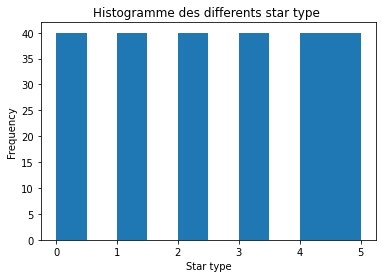

In [53]:
plt.title ("Histogramme des differents star type ")
plt.xlabel("Star type")
df2['Star type'].plot.hist()


Nous avons un ensemble de données bien équilibré

In [64]:
num_cols = list(df2.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['Temperature', 'Luminosity', 'Radius', 'Abs_mag', 'Star type']

<AxesSubplot:>

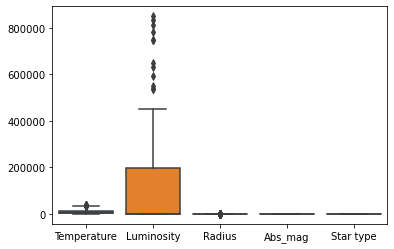

In [65]:
sns.boxplot(data=df2[num_cols])

Nous pouvons avoir des valeurs aberrantes mais je ne veux pas m'en débarrasser car nous n'avons pas un grand ensemble de données et je veux voir la performance des modèles avec cet ensemble de données.

In [67]:
df2.corr(method ='pearson') 

,Temperature,Luminosity,Radius,Abs_mag,Star type
Temperature,1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity,0.393404,1.000000,0.526516,-0.692619,0.676845
Radius,0.064216,0.526516,1.000000,-0.608728,0.660975
Abs_mag,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


<AxesSubplot:>

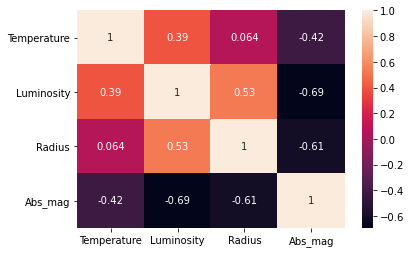

In [66]:
sns.heatmap(df2.loc[:, df2.columns != 'Star type'].corr(), annot=True)

In [337]:
#one_hot=pd.get_dummies(df2['Spectral Class'])
#df2= df2.drop('Spectral Class',axis=1)
#df2=df2.join(one_hot)
df2["Spectral Class"]=df2["Spectral Class"].map({"A": 0, "B": 1, "F": 2, "G": 3, "K": 4, "M": 5, "O": 6})   #convert admitted variable into numerical
df2.head()


,Temperature,Luminosity,Radius,Abs_mag,Star type,Spectral Class,Blue,Red,White,Yellow
0,3068,0.002400,0.1700,16.12,0,5,0,1,0,0
1,3042,0.000500,0.1542,16.60,0,5,0,1,0,0
2,2600,0.000300,0.1020,18.70,0,5,0,1,0,0
3,2800,0.000200,0.1600,16.65,0,5,0,1,0,0
4,1939,0.000138,0.1030,20.06,0,5,0,1,0,0


In [25]:
one_hot=pd.get_dummies(df2['Star color'])
df2= df2.drop('Star color',axis=1)
df2=df2.join(one_hot)
df2

,Temperature,Luminosity,Radius,Abs_mag,Star type,Spectral Class,Blue,Red,White,Yellow
0,3068,0.002400,0.1700,16.12,0,M,0,1,0,0
1,3042,0.000500,0.1542,16.60,0,M,0,1,0,0
2,2600,0.000300,0.1020,18.70,0,M,0,1,0,0
3,2800,0.000200,0.1600,16.65,0,M,0,1,0,0
4,1939,0.000138,0.1030,20.06,0,M,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,O,1,0,0,0
236,30839,834042.000000,1194.0000,-10.63,5,O,1,0,0,0
237,8829,537493.000000,1423.0000,-10.73,5,A,0,0,1,0
238,9235,404940.000000,1112.0000,-11.23,5,A,0,0,1,0


<AxesSubplot:xlabel='Temperature', ylabel='Abs_mag'>

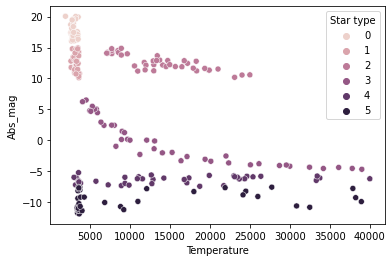

In [26]:
import seaborn as sns
sns.scatterplot(x='Temperature',y='Abs_mag',hue='Star type',data=df2)

<AxesSubplot:>

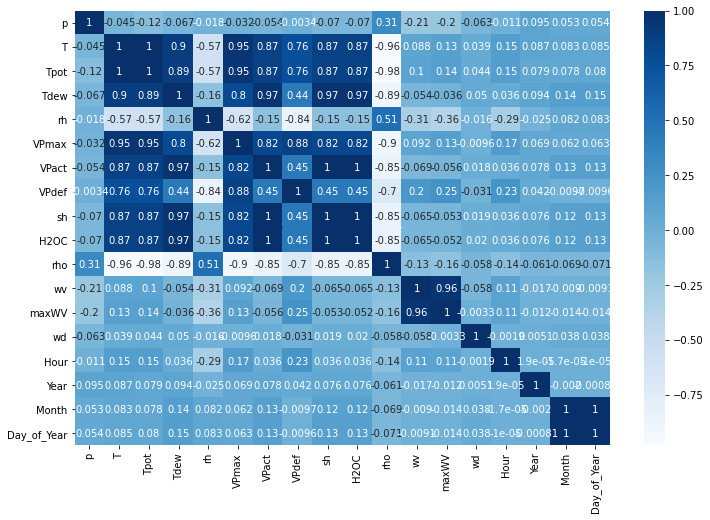

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot = True, cmap = 'Blues')

# KNN


In [30]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
x = df2[['Temperature','Luminosity','Abs_mag','Radius']]
y = df2['Star type']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.6041666666666666


In [31]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))


Accuracy for k= 1 is: 0.6
Accuracy for k= 2 is: 0.6
Accuracy for k= 3 is: 0.62
Accuracy for k= 4 is: 0.58
Accuracy for k= 5 is: 0.69
Accuracy for k= 6 is: 0.65
Accuracy for k= 7 is: 0.62
Accuracy for k= 8 is: 0.69
Accuracy for k= 9 is: 0.62
Accuracy for k= 10 is: 0.6
Accuracy for k= 11 is: 0.6
Accuracy for k= 12 is: 0.58
Accuracy for k= 13 is: 0.6
Accuracy for k= 14 is: 0.62
Accuracy for k= 15 is: 0.67
Accuracy for k= 16 is: 0.6
Accuracy for k= 17 is: 0.65
Accuracy for k= 18 is: 0.62
Accuracy for k= 19 is: 0.62
Accuracy for k= 20 is: 0.65
Accuracy for k= 21 is: 0.67
Accuracy for k= 22 is: 0.62
Accuracy for k= 23 is: 0.67
Accuracy for k= 24 is: 0.69
Accuracy for k= 25 is: 0.73
Accuracy for k= 26 is: 0.69
Accuracy for k= 27 is: 0.73
Accuracy for k= 28 is: 0.69
Accuracy for k= 29 is: 0.77


# Random Forest


In [32]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
x = df2[['Temperature','Luminosity','Abs_mag','Radius']]
y = df2['Star type']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)  #splitting data with test size of 25%

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.9875


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = df2[['Temperature','Luminosity','Abs_mag','Radius']]
y = df2['Star type']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)  #splitting data with test size of 25%

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

print(confusion_matrix(y_test, y_pred))
score = accuracy_score(y_test, y_pred)
print("Accuracy score: ", score)

[[12  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  1  0 17  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 14]]
Accuracy score:  0.9875


# Linear Regression

<AxesSubplot:xlabel='Spectral Class', ylabel='star color'>

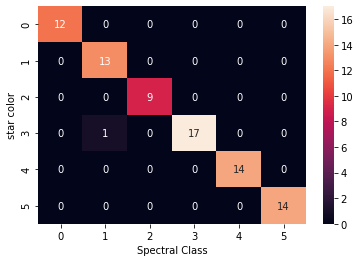

In [35]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['star color'], colnames=['Spectral Class'])
sns.heatmap(confusion_matrix, annot=True)

In [36]:
#classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         9
           3       1.00      0.94      0.97        18
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        14

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

